In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wave

In [89]:
mix_1_wave=wave.open('ICA mix 1.wav','r')


In [90]:
mix_1_wave.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')

- one channel means it is mono sound
- frame rate of 44100 means each second of sound represented by 44100 integers(integers because the file is in the common PCM 16-bit format )
- file has a total of 264515 frames 

In [91]:
#so the length of the sound is 
264515/44100

5.998072562358277

Let's extract the frames of the wave file, which will be a part of the dataset we'll run ICA against:

In [92]:
#extract raw audio from wav file
signal_1_raw = mix_1_wave.readframes(-1)
signal_1 = np.fromstring(signal_1_raw, 'Int16')

<ipython-input-92-1316f00c7cad>:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  signal_1 = np.fromstring(signal_1_raw, 'Int16')
<ipython-input-92-1316f00c7cad>:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal_1 = np.fromstring(signal_1_raw, 'Int16')


In [93]:
signal_1

array([  879,  1268,  1460, ...,  9204,  9553, 10006], dtype=int16)

In [94]:
len(signal_1)

264515

In [95]:
fs=mix_1_wave.getframerate()

In [96]:
len(signal_1)/fs

5.998072562358277

we will plot this array

In [98]:
timing = np.linspace(0, len(signal_1)/fs, num=len(signal_1))

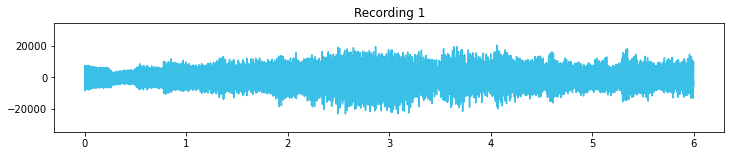

In [105]:
#y #list of points 
x=timing#list of points in time  between 0 and 5,99
plt.figure(figsize=(12,2))
plt.title('Recording 1')
plt.plot(x,signal_1,c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show()

<ipython-input-106-56d22faf21e2>:4: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  signal_2=np.fromstring(signal_2_raw,'Int16')
<ipython-input-106-56d22faf21e2>:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal_2=np.fromstring(signal_2_raw,'Int16')


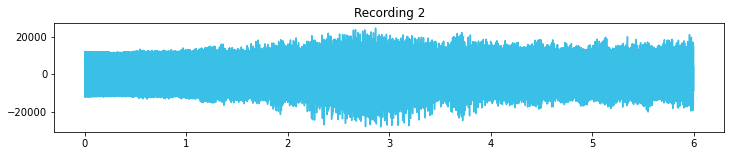

In [106]:
mix_2_wave=wave.open('ICA mix 2.wav','r')

signal_2_raw=mix_2_wave.readframes(-1)
signal_2=np.fromstring(signal_2_raw,'Int16')

plt.figure(figsize=(12,2))
plt.title('Recording 2')
plt.plot(x,signal_2,c="#3ABFE7")
plt.show()

<ipython-input-107-13834ebe0b0a>:4: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  signal_3=np.fromstring(signal_3_raw,'Int16')
<ipython-input-107-13834ebe0b0a>:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal_3=np.fromstring(signal_3_raw,'Int16')


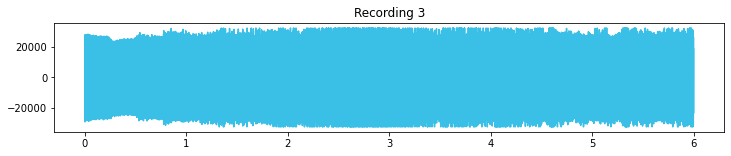

In [107]:
mix_3_wave=wave.open('ICA mix 3.wav','r')

signal_3_raw=mix_3_wave.readframes(-1)
signal_3=np.fromstring(signal_3_raw,'Int16')

plt.figure(figsize=(12,2))
plt.title('Recording 3')
plt.plot(x,signal_3,c="#3ABFE7")
plt.show()

Now that we've read all three files, we're ready to [zip](https://docs.python.org/3/library/functions.html#zip) them to create our dataset.

* Create dataset ```X``` by zipping signal_1, signal_2, and signal_3 into a single list

In [111]:
x=list(zip(signal_1,signal_2,signal_3))
x[:10]

[(879, 157, 879),
 (1268, 899, 2584),
 (1460, 1610, 4081),
 (1756, 2325, 5682),
 (1943, 3022, 7147),
 (2216, 3718, 8689),
 (2407, 4386, 10114),
 (2668, 5056, 11583),
 (2866, 5690, 12954),
 (3106, 6318, 14327)]

In [113]:
from sklearn.decomposition import FastICA 

In [115]:
Ica=FastICA(n_components=3)#whiten='arbitrary-variance' (default).
#whiten='unit-variance', the whitening matrix is rescaled to ensure that each recovered source has unit variance.

In [116]:
x_transformed=Ica.fit_transform(x)

In [117]:
x_transformed.shape

(264515, 3)

In [121]:
result_signal_1 = x_transformed[:,0]
result_signal_2 = x_transformed[:,1]
result_signal_3 = x_transformed[:,2]

Let's plot to see how the wave forms look

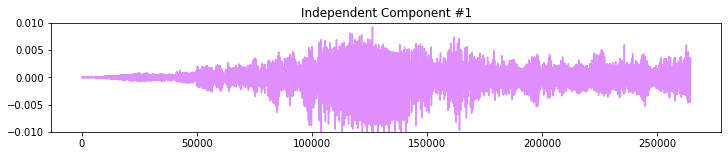

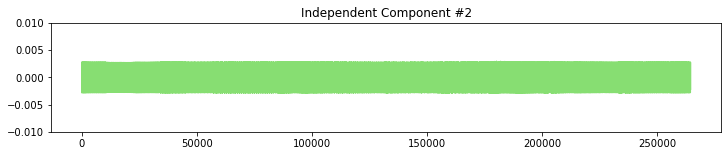

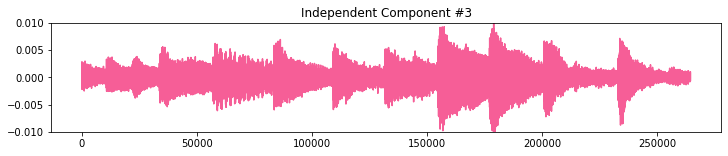

In [123]:
# Plot Independent Component #1
plt.figure(figsize=(12,2))
plt.title('Independent Component #1')
plt.plot(result_signal_1, c="#df8efd")
plt.ylim(-0.010, 0.010)
plt.show()

# Plot Independent Component #2
plt.figure(figsize=(12,2))
plt.title('Independent Component #2')
plt.plot(result_signal_2, c="#87de72")
plt.ylim(-0.010, 0.010)
plt.show()

# Plot Independent Component #3
plt.figure(figsize=(12,2))
plt.title('Independent Component #3')
plt.plot(result_signal_3, c="#f65e97")
plt.ylim(-0.010, 0.010)
plt.show()

Do some of these look like musical wave forms? 

The best way to confirm the result is to listen to resulting files. So let's save as wave files and verify. But before we do that, we'll have to:
* convert them to integer (so we can save as PCM 16-bit Wave files), otherwise only some media players would be able to play them and others won't
* Map the values to the appropriate range for int16 audio. That range is between -32768 and +32767. A basic mapping can be done by multiplying by 32767.
* The sounds will be a little faint, we can increase the volume by multiplying by a value like 100

In [125]:
from scipy.io import wavfile

# Convert to int, map the appropriate range, and increase the volume a little bit
result_signal_1_int = np.int16(result_signal_1*32767*100)
result_signal_2_int = np.int16(result_signal_2*32767*100)
result_signal_3_int = np.int16(result_signal_3*32767*100)


# Write wave files
wavfile.write("result_signal_1.wav", fs, result_signal_1_int)
wavfile.write("result_signal_2.wav", fs, result_signal_2_int)
wavfile.write("result_signal_3.wav", fs, result_signal_3_int)

In [ ]:
[result_signal_1.wav](result_signal_1)